In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

1 Physical GPUs, 1 Logical GPUs


Get GPU information to know which GPU is being used in training and testing

In [4]:
!nvidia-smi

Sun Nov 22 20:51:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    29W /  70W |    227MiB / 15079MiB |      2%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170500096/170498071 [==============================] - 2s 0us/step


Base model with the following structure:

For each Conv2D layer, the default stride value of (1, 1) is used unless otherwise specified

*   Conv2D layer with 32 neurons, and a kernel size of (3, 3) and padding to keep shape of input
*   Conv2D layer with 32 neurons, and a kernel size of (3, 3) and padding to keep shape of input
*   MaxPooling layer with a window size of (2, 2) that computes the max value within the window
*   Dropout layer that drops 0.2 (20%) of all values
*   Conv2D layer with 64 neurons, and a kernel size of (3, 3) and padding to keep shape of input
*   Conv2D layer with 64 neurons, and a kernel size of (3, 3) and padding to keep shape of input
*   MaxPooling layer with a window size of (2, 2) that computes the max value within the window
*   Dropout layer that drops 0.2 (20%) of all values
*   Flatten layer
*   Dense fully connected layer
*   Dropout layer 
*   Dense fully connected layer of outputs of the 10 image classes

All models that are used use the same amount of neurons as a relatively high accuracy is acquired during training

In [6]:
model = tf.keras.models.Sequential([
          Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [8]:
h = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5382 - accuracy: 0.8098 - val_loss: 0.7370 - val_accuracy: 0.7600
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4955 - accuracy: 0.8241 - val_loss: 0.7064 - val_accuracy: 0.7653
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4641 - accuracy: 0.8357 - val_loss: 0.7581 - val_accuracy: 0.7632
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4370 - accuracy: 0.8457 - val_loss: 0.7599 - val_accuracy: 0.7590
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4063 - accuracy: 0.8555 - val_loss: 0.7303 - val_accuracy: 0.7673
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3804 - accuracy: 0.8633 - val_loss: 0.7390 - val_accuracy: 0.7712
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3665 - accuracy: 0.8693 - val_loss: 0.7651 - val_accuracy:

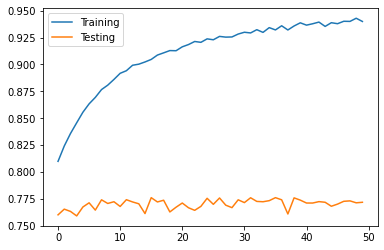

In [33]:
plot(h.history['accuracy'], label="Training")
plot(h.history['val_accuracy'], label="Testing")
pyplot.legend()

CNN with decreased MaxPooling window to 1x1

In [10]:
model2 = tf.keras.models.Sequential([
          Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(1, 1)),
          Dropout(0.2),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(1, 1)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)       

In [11]:
h2 = model2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5363 - accuracy: 0.4439 - val_loss: 1.1964 - val_accuracy: 0.5738
Epoch 2/50
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1428 - accuracy: 0.5939 - val_loss: 1.0374 - val_accuracy: 0.6278
Epoch 3/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9449 - accuracy: 0.6636 - val_loss: 0.9867 - val_accuracy: 0.6532
Epoch 4/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7785 - accuracy: 0.7221 - val_loss: 0.9656 - val_accuracy: 0.6716
Epoch 5/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6282 - accuracy: 0.7764 - val_loss: 0.9471 - val_accuracy: 0.6768
Epoch 6/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.4952 - accuracy: 0.8240 - val_loss: 1.0806 - val_accuracy: 0.6856
Epoch 7/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.3987 - accuracy: 0.8578 - val_loss: 1.2629 -

This CNN has a higher accuracy during training, but a lower validation accuracy when testing

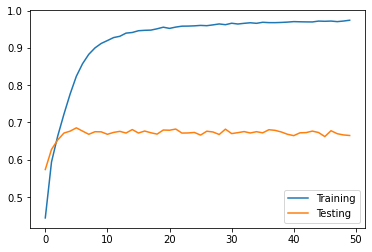

In [34]:
plot(h2.history['accuracy'], label="Training")
plot(h2.history['val_accuracy'], label="Testing")
pyplot.legend()

This CNN has a larger kernel size

In [13]:
model3 = tf.keras.models.Sequential([
          Conv2D(32, (4, 4), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (4, 4), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(64, (4, 4), padding='same', activation='relu'),
          Conv2D(64, (4, 4), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        1568      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        65600     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

In [14]:
h3 = model3.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5874 - accuracy: 0.4178 - val_loss: 1.2345 - val_accuracy: 0.5516
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1665 - accuracy: 0.5826 - val_loss: 1.0336 - val_accuracy: 0.6301
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9946 - accuracy: 0.6490 - val_loss: 0.9725 - val_accuracy: 0.6564
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8841 - accuracy: 0.6880 - val_loss: 0.8716 - val_accuracy: 0.7005
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8042 - accuracy: 0.7162 - val_loss: 0.8570 - val_accuracy: 0.7039
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7450 - accuracy: 0.7355 - val_loss: 0.7901 - val_accuracy: 0.7281
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6868 - accuracy: 0.7574 - val_loss: 0.7676 - val_accur

This CNN has both a decreased training and validation accuracy

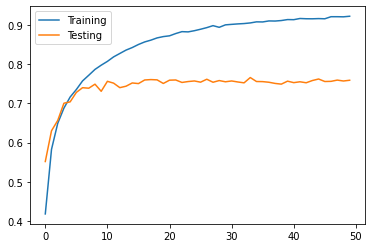

In [35]:
plot(h3.history['accuracy'], label="Training")
plot(h3.history['val_accuracy'], label="Testing")
pyplot.legend()

Decreased kernel size

In [16]:
model4 = tf.keras.models.Sequential([
          Conv2D(32, (2, 2), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (2, 2), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(64, (2, 2), padding='same', activation='relu'),
          Conv2D(64, (2, 2), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        16448     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)         

In [17]:
h4 = model4.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4527 - accuracy: 0.4733 - val_loss: 1.0643 - val_accuracy: 0.6181
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0427 - accuracy: 0.6298 - val_loss: 0.9686 - val_accuracy: 0.6544
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9042 - accuracy: 0.6792 - val_loss: 0.8200 - val_accuracy: 0.7093
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8080 - accuracy: 0.7165 - val_loss: 0.7854 - val_accuracy: 0.7254
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7355 - accuracy: 0.7387 - val_loss: 0.7771 - val_accuracy: 0.7309
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6760 - accuracy: 0.7597 - val_loss: 0.7393 - val_accuracy: 0.7467
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6274 - accuracy: 0.7771 - val_loss: 0.7315 - val_accuracy:

Slightly lower training and testing accuracy. Almost on par with the base model

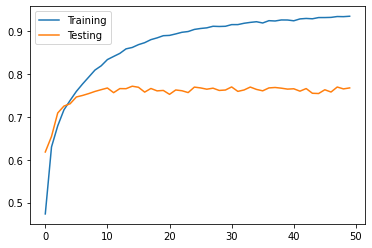

In [36]:
plot(h4.history['accuracy'], label="Training")
plot(h4.history['val_accuracy'], label="Testing")
pyplot.legend()

Add a stride of 2x2 in every Conv2D layer apart from input layer

In [19]:
model5 = tf.keras.models.Sequential([
          Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (3, 3), (2, 2), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(64, (3, 3), (2, 2), padding='same', activation='relu'),
          Conv2D(64, (3, 3), (2, 2), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 2, 2, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 64)         

In [20]:
h5 = model5.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6642 - accuracy: 0.3809 - val_loss: 1.3457 - val_accuracy: 0.5146
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3554 - accuracy: 0.5106 - val_loss: 1.1590 - val_accuracy: 0.5836
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2014 - accuracy: 0.5707 - val_loss: 1.0459 - val_accuracy: 0.6243
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0971 - accuracy: 0.6083 - val_loss: 1.0319 - val_accuracy: 0.6330
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0304 - accuracy: 0.6350 - val_loss: 0.9282 - val_accuracy: 0.6712
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9774 - accuracy: 0.6532 - val_loss: 0.9245 - val_accuracy: 0.6759
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9421 - accuracy: 0.6666 - val_loss: 0.8863 - val_accuracy:

This CNN has a much lower training accuracy and a slightly lower validation accuracy

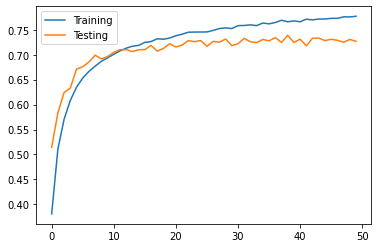

In [38]:
plot(h5.history['accuracy'], label="Training")
plot(h5.history['val_accuracy'], label="Testing")
pyplot.legend()

Increase stride amount to 4x4 and 2x2 in each block

In [22]:
model6 = tf.keras.models.Sequential([
          Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (3, 3), (4, 4), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(64, (3, 3), (2, 2), padding='same', activation='relu'),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 2, 2, 64)          18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 2, 2, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 64)         

In [23]:
h6 = model6.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7227 - accuracy: 0.3603 - val_loss: 1.3923 - val_accuracy: 0.4973
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4433 - accuracy: 0.4737 - val_loss: 1.2895 - val_accuracy: 0.5276
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3442 - accuracy: 0.5146 - val_loss: 1.2203 - val_accuracy: 0.5653
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2811 - accuracy: 0.5384 - val_loss: 1.1655 - val_accuracy: 0.5790
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2328 - accuracy: 0.5590 - val_loss: 1.1223 - val_accuracy: 0.6014
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1938 - accuracy: 0.5718 - val_loss: 1.1200 - val_accuracy: 0.6001
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1639 - accuracy: 0.5845 - val_loss: 1.0786 - val_accuracy:

Training and validation accuracies are much lower than the base model 

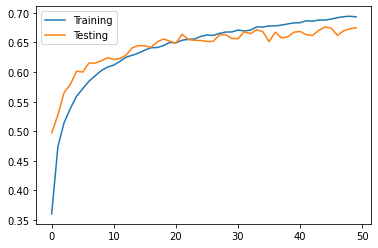

In [37]:
plot(h6.history['accuracy'], label="Training")
plot(h6.history['val_accuracy'], label="Testing")
pyplot.legend()

In [55]:
model7 = tf.keras.models.Sequential([
          Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(3, 3)),
          Dropout(0.2),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(3, 3)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 64)         

In [56]:
h7 = model7.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5333 - accuracy: 0.4345 - val_loss: 1.2311 - val_accuracy: 0.5579
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1235 - accuracy: 0.6004 - val_loss: 0.9414 - val_accuracy: 0.6648
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9558 - accuracy: 0.6617 - val_loss: 0.8700 - val_accuracy: 0.6969
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8614 - accuracy: 0.6965 - val_loss: 0.8090 - val_accuracy: 0.7214
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8060 - accuracy: 0.7173 - val_loss: 0.7470 - val_accuracy: 0.7392
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7620 - accuracy: 0.7303 - val_loss: 0.7183 - val_accuracy: 0.7521
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7255 - accuracy: 0.7462 - val_loss: 0.7049 - val_accuracy:

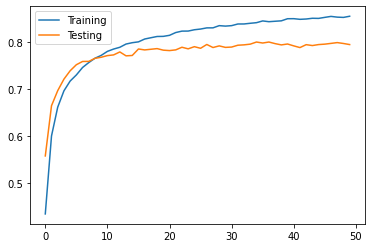

In [57]:
plot(h7.history['accuracy'], label="Training")
plot(h7.history['val_accuracy'], label="Testing")
pyplot.legend()

In [58]:
model8 = tf.keras.models.Sequential([
          Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(4, 4)),
          Dropout(0.2),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(4, 4)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model8.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 64)         

In [59]:
h8 = model8.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5946 - accuracy: 0.4097 - val_loss: 1.2375 - val_accuracy: 0.5519
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1848 - accuracy: 0.5741 - val_loss: 1.0231 - val_accuracy: 0.6342
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0302 - accuracy: 0.6346 - val_loss: 0.9012 - val_accuracy: 0.6828
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9430 - accuracy: 0.6672 - val_loss: 0.9080 - val_accuracy: 0.6801
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8819 - accuracy: 0.6870 - val_loss: 0.8026 - val_accuracy: 0.7254
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8388 - accuracy: 0.7045 - val_loss: 0.7856 - val_accuracy: 0.7285
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8069 - accuracy: 0.7154 - val_loss: 0.7469 - val_accuracy:

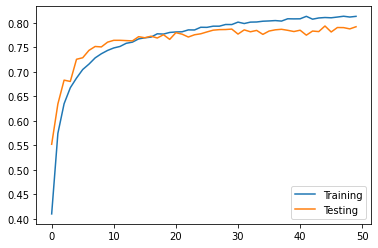

In [60]:
plot(h8.history['accuracy'], label="Training")
plot(h8.history['val_accuracy'], label="Testing")
pyplot.legend()

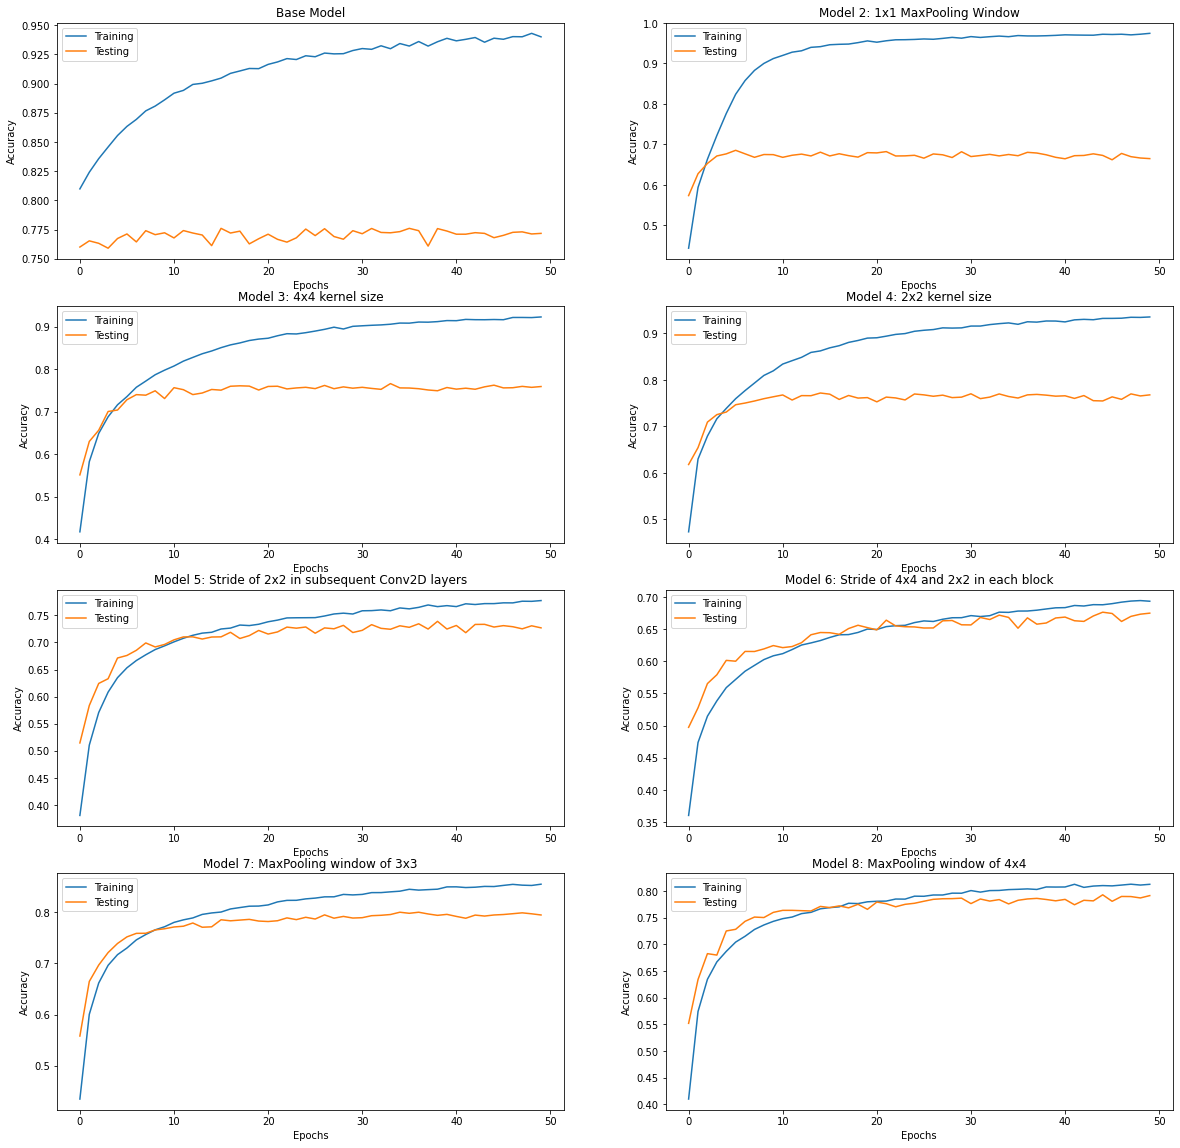

In [62]:
pyplot.subplot(4,2,1)
pyplot.plot(h.history['accuracy'], label="Training")
pyplot.plot(h.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Base Model")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,2)
pyplot.plot(h2.history['accuracy'], label="Training")
pyplot.plot(h2.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 2: 1x1 MaxPooling Window")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,3)
pyplot.plot(h3.history['accuracy'], label="Training")
pyplot.plot(h3.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 3: 4x4 kernel size")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,4)
pyplot.plot(h4.history['accuracy'], label="Training")
pyplot.plot(h4.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 4: 2x2 kernel size")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,5)
pyplot.plot(h5.history['accuracy'], label="Training")
pyplot.plot(h5.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 5: Stride of 2x2 in subsequent Conv2D layers")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,6)
pyplot.plot(h6.history['accuracy'], label="Training")
pyplot.plot(h6.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 6: Stride of 4x4 and 2x2 in each block")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,7)
pyplot.plot(h7.history['accuracy'], label="Training")
pyplot.plot(h7.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 7: MaxPooling window of 3x3")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,8)
pyplot.plot(h8.history['accuracy'], label="Training")
pyplot.plot(h8.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 8: MaxPooling window of 4x4")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

From the graphs show above, having a low MaxPooling2D windows improves overall training accuracy, but decreases validation accuracy. For an increased window size, the opposite is true, with a lower accuracy and higher validation accuracy.

Having a large kernel window does improve the validation accuracy and not too much of a difference in terms of testing accuracy.

Using any amount of stride apart from the default of 1x1 results in much lower training accuracy and the validation accuracy converges to that of the training.

